In [5]:
import pandas as pd
corpus = pd.read_csv("corpus_JHE.csv")
#print(corpus['text'][0])
print(corpus.shape)
n = corpus.shape[0]
#prints the size of the csv file, the first number is the number of the documents
print(n)

(4014, 14)
4014


In [6]:
# Function to print top words of LDA ()
def print_top_words(model, feature_names, n_top_words):
    for index, topic in enumerate(model.components_):
        message = "\nTopic #{}:".format(index)
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1 :-1]])
        print(message)
        print("="*70)

In [7]:
#transform texts into word-vectors 
from sklearn.feature_extraction.text import CountVectorizer
# Storing the entire training text in a list
text = list(corpus.text.values)
#these are imposrant parameter settings, 
#max_df=0.5 means that each token (word) can appear in at most 50% of the documents, 
#min_df=0.05 means that each token needs to appear in minimum 5% of the documents)
tf_vectorizer = CountVectorizer(max_df=0.5, min_df=0.05)
# tokenize and build vocab
tf_vectorizer.fit(text)
#print(tf_vectorizer.vocabulary_)
# encode document
tf = tf_vectorizer.transform(text)
# summarize encoded vector
#print(tf.shape)
#print(tf.toarray())
#tf

In [8]:
#plotting a histogram of the most frequent words
import numpy as np
# Plotly imports
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

feature_names = tf_vectorizer.get_feature_names()
count_vec = np.asarray(tf.sum(axis=0)).ravel()
zipped = list(zip(feature_names, count_vec))
x, y = (list(x) for x in zip(*sorted(zipped, key=lambda x: x[1], reverse=True)))
# Now I want to extract out on the top 15 and bottom 15 words
Y = np.concatenate([y[0:15], y[-16:-1]])
X = np.concatenate([x[0:15], x[-16:-1]])

# Plotting the Plot.ly plot for the Top 50 word frequencies
data = [go.Bar(
            x = x[0:50],
            y = y[0:50],
            marker= dict(colorscale='Jet',
                         color = y[0:50]
                        ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Top 50 Word frequencies after Preprocessing'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

# Plotting the Plot.ly plot for the Top 50 word frequencies
data = [go.Bar(
            x = x[-100:],
            y = y[-100:],
            marker= dict(colorscale='Portland',
                         color = y[-100:]
                        ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Bottom 100 Word frequencies after Preprocessing'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

In [9]:
# the actual topic modeling is here
#from collections import Counter
#from scipy.misc import imread
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from matplotlib import pyplot as plt
#%matplotlib inline
import base64
import numpy as np
import pandas as pd
# n_components=10 -- the number of topics (clusters), change this to get another number of topcis
# random_state = 1981 -- this is a random seed in order to have the results reproducible, otherwise, 
# since the algorithm has random components, the topics may vary slightly from iteration to iteration, 
# and particularly the order in which topics are displayed may vary)
lda_model = LatentDirichletAllocation(n_components=10, max_iter=5,
                                learning_method = 'online',
                                learning_offset = 50.,
                                random_state = 1981)

In [10]:
#fit the topic model
lda_model.fit(tf)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, random_state=1981)

In [11]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda_model.score(tf))
# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(tf))
# See model parameters
print(lda_model.get_params())

Log Likelihood:  -65584333.80348561
Perplexity:  1598.938876935933
{'batch_size': 128, 'doc_topic_prior': None, 'evaluate_every': -1, 'learning_decay': 0.7, 'learning_method': 'online', 'learning_offset': 50.0, 'max_doc_update_iter': 100, 'max_iter': 5, 'mean_change_tol': 0.001, 'n_components': 10, 'n_jobs': None, 'perp_tol': 0.1, 'random_state': 1981, 'topic_word_prior': None, 'total_samples': 1000000.0, 'verbose': 0}


In [12]:
n_top_words = 30
print("\nTopics in LDA model: ")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda_model, tf_feature_names, n_top_words)


Topics in LDA model: 

Topic #0:neandertal neanderthal sapiens trinkaus spain shape european arsuaga europe atapuerca stringer canal castro hublin cranial los rib anthropol rosa paleolithic del bermufadez erectus smith de paris sima lateral hominins krapina

Topic #1:habitat formation fauna basin east locality isotope kenya climate plant lake bed miocene forest member tuff vegetation pliocene hominin leakey isotopic diet taxon water eastern van southern valley northern open

Topic #2:man genetic rate american gene chromosome dna frequency sequence physical growth selection biological genetics distance ancient blood language trait cell child disease acid must series protein society australian indian sex

Topic #3:mass limb ruff estimate femur femoral muscle locomotion walking force growth joint dimorphism male adult head locomotor phys female anthropol proportion gait chimpanzee bipedal equation skeletal stature regression foot pelvis

Topic #4:australopithecus erectus afarensis crania

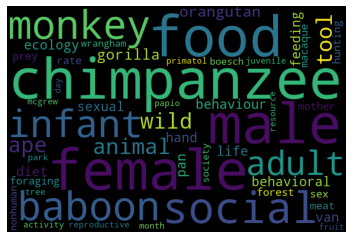

In [13]:
from wordcloud import WordCloud
# Generate a word cloud image for given topic

# most important words for each topic
vocab = tf_feature_names

def draw_word_cloud(index):
    imp_words_topic=""
    comp=lda_model.components_[index]
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:50]
    for word in sorted_words:
        imp_words_topic=imp_words_topic+" "+word[0]

    wordcloud = WordCloud(width=600, height=400).generate(imp_words_topic)
    plt.figure( figsize=(5,5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

#change the numbers from 0 to 9 to see all word clouds one-by-one
draw_word_cloud(9)


In [14]:
#print maximum topic of a document
doc_topic = lda_model.transform(tf)
for n in range(doc_topic.shape[0]):
    topic_most_pr = doc_topic[n].argmax()
    #print("doc: {} topic: {}\n".format(n,topic_most_pr))

In [15]:
n = tf.shape[0]
print(n)
# Create Document — Topic Matrix
lda_output = lda_model.transform(tf)
print(lda_output.shape)
# column names
topicnames = ["Topic" + str(i) for i in range(lda_model.n_components)]
# index names
docnames = ["Doc" + str(i) for i in range(n)]
# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)
# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic["dominant_topic"] = dominant_topic
df_document_topic["eid"] = corpus.eid.values
df_document_topic["pii"] = corpus.pii.values
#saving document-topic matrix for further analysis
df_document_topic.to_csv('dominant_topics.csv',index=False)

4014
(4014, 10)


In [16]:
# saving a topic-keyword matrix as a csv for further analysis
df_topic_keywords = pd.DataFrame(lda_model.components_)
# Assign Column and Index
df_topic_keywords.columns = tf_vectorizer.get_feature_names()
df_topic_keywords.index = topicnames
df_topic_keywords.to_csv('topics_keywords.csv',index=True)
print(df_topic_keywords.shape)

(10, 4102)


In [17]:
# sentiment classification, write sentiment scores to csv
#(columns in output csv: neg -- fraction of negative sentiment per document, 
#neu -- fraction of neutral sentiment per document, 
#pos - fraction of positive sentiment per document,
#compound -- overall polarity score which I am not using in the analysis,
#eid and pii -- unique identifiers of the articles)
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

for x in range(n):
    sen = sia.polarity_scores(corpus.text.values[x])
    df = pd.DataFrame([sen])
    df['eid'] = corpus.eid.values[x]
    df['pii'] = corpus.pii.values[x]

    if x==0:
        sen_all = df
    else:
        frames = [sen_all, df]
        sen_all = pd.concat(frames)

sen_all.to_csv('sentiments.csv',index=False)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/zliobait/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
